# Домашнее задание по кластеризации

Сегментация клиентов — это разделение рынка на отдельные группы клиентов со схожими характеристиками. Сегментация клиентов может быть мощным средством выявления неудовлетворенных потребностей клиентов. Используя вышеуказанные данные, компании могут превзойти конкурентов, разработав уникальные привлекательные продукты и услуги.

Вы владеете супермаркетом и с помощью членских карт у вас есть некоторые основные данные о ваших клиентах, такие как идентификатор клиента, возраст, пол, годовой доход и оценка расходов.

Вы хотите понять клиентов, например, кто является целевыми клиентами, чтобы это можно было передать маркетинговой команде и соответствующим образом спланировать стратегию.

Для этого вам нужно разбить клиентов на различные группы по похожести.

## Задания

### Задание 1.

Провести исследование данных с визуализацией:
1. Постройте Диаграмму разброса (точечный график) от двух переменных: `Age` и `Income`.
2. Построить график анализа пропущенных значений.
3. Построить boxplot для всех числовых переменных. График должен быть один, используя разные subplot() для каждой переменной (т.е. одна фигура и несколько сабплотов).
4. Построить barplot по переменной `Sex`.
5. Построить матрицу корреляции для всех переменных.

*P.s. Все графики, оси и переменные должны быть подписаны. И по графикам необходимо сделать выводы.*

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np

Text(0.5, 1.0, 'Точечный график от Age и Income')

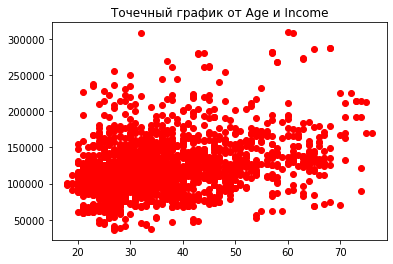

In [10]:


#1 
import pandas as pd
import matplotlib.pyplot as plt
segmentation_data= 'https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_2/main/home_work_clustering/segmentation%20data.csv'
seg = pd.read_csv(segmentation_data)
fig, ax = plt.subplots()
ax.scatter(seg["Age"], seg["Income"], c='red')
ax.set_title('Точечный график от Age и Income')
# Плохо видно зависимость между возрастом и доходом клиента

<Figure size 1080x648 with 0 Axes>

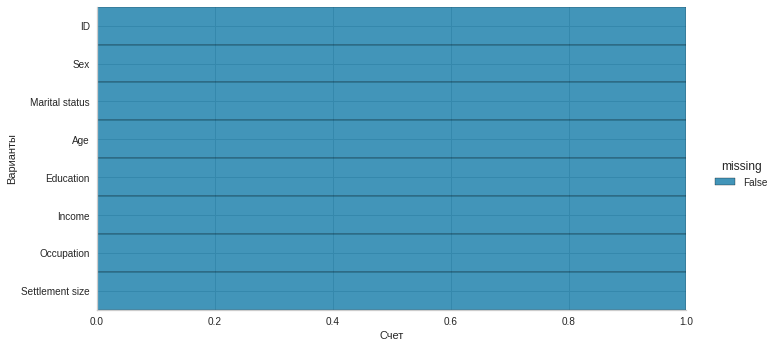

In [27]:
#2
plt.figure(figsize=(15,9))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)
plt.xlabel("Счет")
plt.ylabel("Варианты")
plt.show()
# Погрешности в графике нет

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


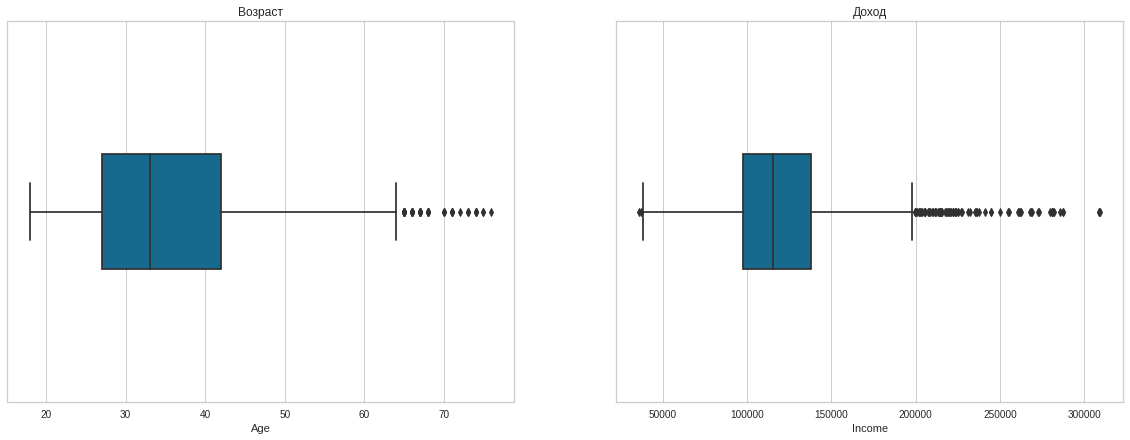

In [33]:
#3
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.boxplot(df['Age'], ax=ax[0], width=0.3)
sns.boxplot(df['Income'], ax=ax[1], width=0.3)
ax[0].set_title("Возраст")
ax[1].set_title("Доход")
plt.show()
# Люди до 65 лет и доходом более 200к выделяются из графика

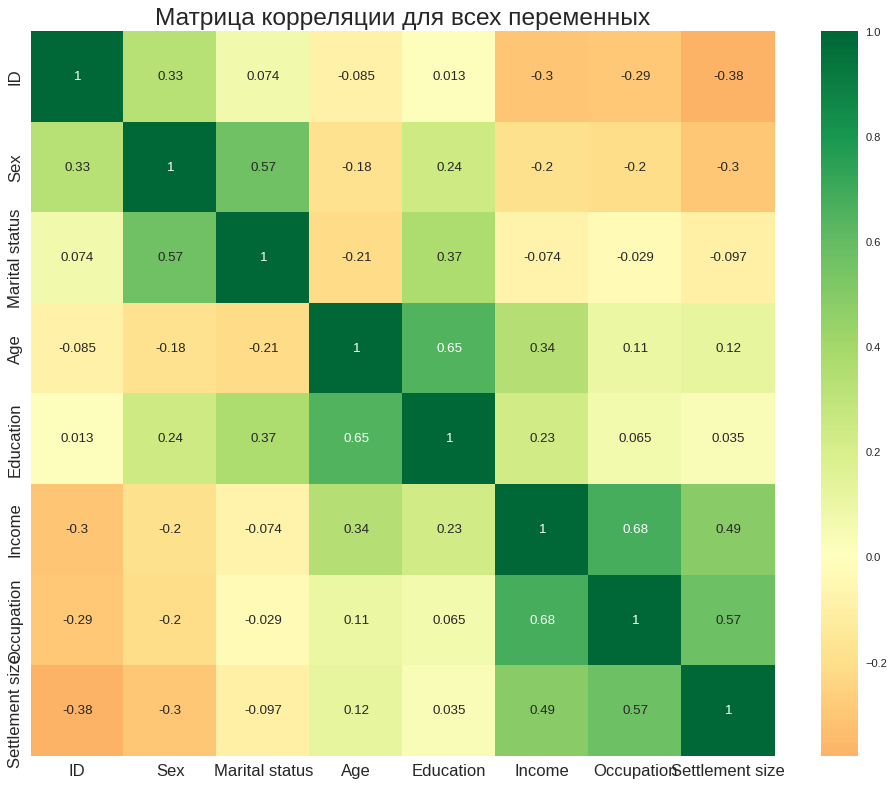

In [39]:
#5
plt.figure(figsize=(15,12), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Матрица корреляции для всех переменных', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


### Задание 2

Реализовать метод кластарезации KMeans:
1. Методом локтя и силуета (в том числе с использованием графиков) оценить оптимальное число кластеров и обосновать его.
2. Построить точечный график объектов до кластеризации и после с цветовым разделением на кластеры. Для построения графиков придется взять только две переменные как признаки, но строить кластеризацию не обязательно на двух переменных. 

P.s. все графики должны быть подписанны и к ним должны прилагаться выводы.

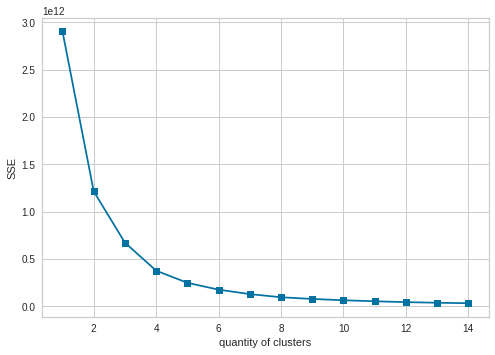

In [45]:
#1
SSE = [] 
for k in range(1,15):
    kmeans = KMeans(n_clusters = k) 
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
plt.plot(range(1,15), SSE, marker='s');
plt.xlabel('quantity of clusters')
plt.ylabel('SSE');
plt.show()
# Оптималка 4 кластера

### Задание 3

Реализовать иерархический метод кластарезации:
1. Должны быть построены дендрограммы и обоснован выбор количества кластеров.
2. Построить точечный график объектов до кластеризации и после с цветовым разделением на кластеры. Для построения графиков придется взять только две переменные как признаки, но строить кластеризацию не обязательно на двух переменных.

P.s. все графики должны быть подписанны и к ним должны прилагаться выводы.

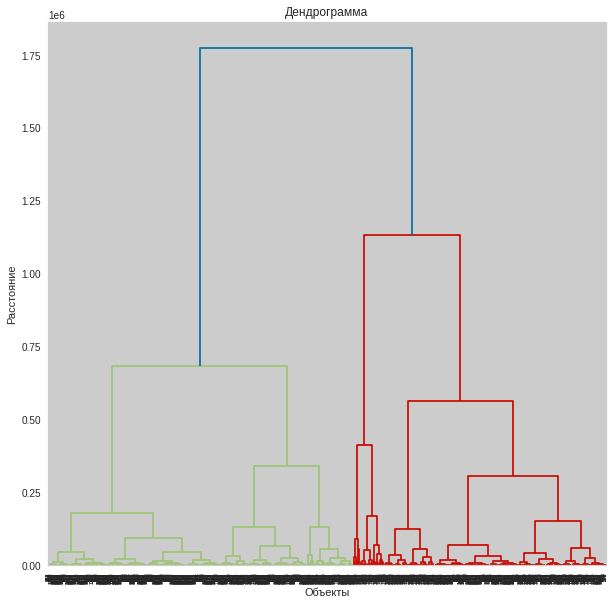

In [59]:
#1
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(df, 'ward')
fig = plt.figure(figsize=(10, 10))
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
dn = dendrogram(Z)
plt.title("Дендрограмма") 
plt.ylabel("Расстояние") 
plt.xlabel("Объекты") 
plt.show()
# Оптималка 4 кластера